Homework:
1. Use more features to trains the model.
2. Make the NN more complex, increase hidden layers, increase hiden layer perceptrons
3. Change the test data Null data filling approach.
  Hint: Can we use the most similar houses data mean rather than the whole training data mean.

In [ ]:
from google.colab import files

# Upload Kaggle train/test to google drive
files.upload()


{}

In [ ]:
ls

sample_data/  test.csv  train.csv


In [ ]:
import pandas as pd

df = pd.read_csv('train.csv')

In [ ]:
# Head
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Shape
df.shape

(1460, 81)

In [ ]:
# Check null data
missing_counts = df.isnull().sum()
missing_counts[missing_counts>0].sort_values(ascending=False)

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81


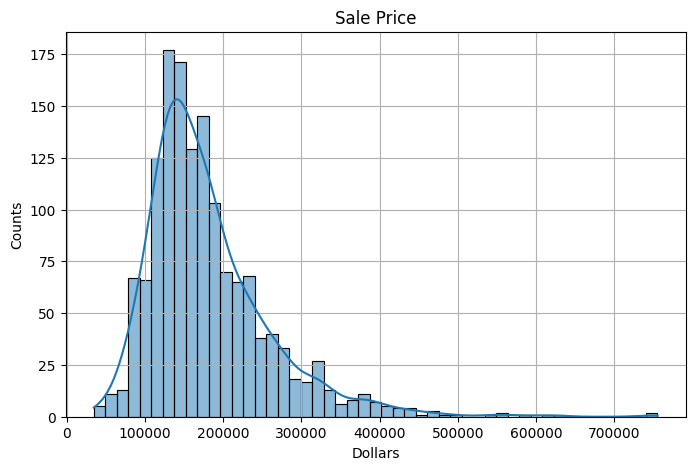

In [ ]:
# plot sales price
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['SalePrice'], kde=True) # kde - Kernal density estimate
plt.title("Sale Price")
plt.xlabel("Dollars")
plt.ylabel("Counts")
plt.grid(True)
plt.show()



In [ ]:
df[selected_cols].corr()

,SalePrice,GrLivArea,TotalBsmtSF,GarageArea,1stFlrSF
SalePrice,1.000000,0.708624,0.613581,0.623431,0.605852
GrLivArea,0.708624,1.000000,0.454868,0.468997,0.566024
TotalBsmtSF,0.613581,0.454868,1.000000,0.486665,0.819530
GarageArea,0.623431,0.468997,0.486665,1.000000,0.489782
1stFlrSF,0.605852,0.566024,0.819530,0.489782,1.000000


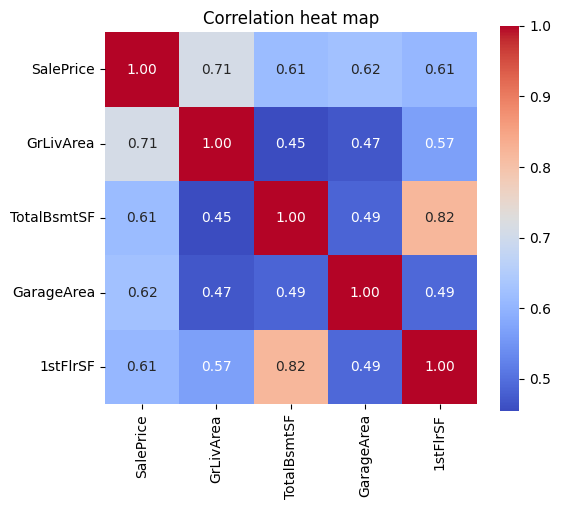

In [ ]:
# Correlation between columns
selected_cols = ['SalePrice', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', '1stFlrSF']
corr = df[selected_cols].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True) ## annotation, format, colormap,
plt.title("Correlation heat map")
plt.show()

In [ ]:
# Load data into dataframe
train_df = pd.read_csv("train.csv")

# Select only for features for training as demo in class
features = ['GrLivArea', 'TotalBsmtSF', 'GarageArea', '1stFlrSF']
target = 'SalePrice'
X = train_df[features].values
y = train_df[target].values.reshape(-1, 1)

In [ ]:
def checkNull(features, df):
  # Check if there is null
  # Check feature columns for missing values
  print(df[features].isnull().sum())

In [ ]:
checkNull(features, train_df)

GrLivArea      0
TotalBsmtSF    0
GarageArea     0
1stFlrSF       0
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) # X_val, y_val for validation

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1168, 4), (292, 4), (1168, 1), (292, 1))

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

## Use mean as imputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)

# Feature standardization

## Normalization for both X/Y, train/val
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # Training data normalization, and save the normalization parameters in sacler
X_val = scaler.transform(X_val)         # Use the same normalization scalar for validation data

y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train)
y_val = y_scaler.transform(y_val)

In [ ]:
import torch

# 转为 PyTorch Tensor
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)

In [ ]:
## Define a simple NN
import torch.nn as nn

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__() # Without super().__init__(), PyTorch will not register model parameters
        self.net = nn.Sequential(
            nn.Linear(4, 16),   # 1 hidden layer. For each perceptron, there are 4 inputs, there are 16 perceptrons.
            nn.ReLU(),
            nn.Linear(16, 20),   # 2 hidden layer. For each perceptron
            nn.ReLU(),
            nn.Linear(20, 1)    # regression for the output layer, no activation function
        )

    def forward(self, x):
        return self.net(x)

In [ ]:
## Init model, loss function, gradient descent optmizer

model = SimpleNN()
loss_fn = nn.MSELoss() ## regression task, no we use MSE loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) ## Adaptive Moment Estimation. 1. Based on history's gradient for the current gradient 2. init learning rate is 0.01 for each parameter individually

In [ ]:
## There are four data/grad.
# 1. hidden laryer 1 weight
# 2. hidden laryer 1 bias
# 3. output layer weight
# 4. output layer bias

for p in model.parameters():
  print(f"p.data is {p.data}")
  print(f"p.grad is {p.grad}")

p.data is tensor([[ 0.3091, -0.4415,  0.4979, -0.1620],
        [ 0.1109, -0.0417,  0.0782, -0.2659],
        [ 0.3245,  0.3347,  0.3046,  0.3829],
        [ 0.4073,  0.3195, -0.3403, -0.4592],
        [-0.3171,  0.1198, -0.3510, -0.2785],
        [ 0.2861, -0.0684, -0.0793, -0.1405],
        [-0.2908,  0.2527, -0.4005,  0.2108],
        [ 0.1454,  0.4540,  0.4189, -0.0817],
        [ 0.4857, -0.1196, -0.1147, -0.1403],
        [ 0.4202,  0.4195,  0.4728, -0.0953],
        [ 0.4395, -0.2445, -0.4296,  0.4957],
        [ 0.2729,  0.3023,  0.4910, -0.2833],
        [ 0.4315, -0.0532,  0.0841,  0.2483],
        [-0.1913,  0.1756, -0.3483,  0.2775],
        [-0.2376,  0.1427,  0.2940,  0.0019],
        [ 0.1943, -0.1423,  0.0983, -0.1724]])
p.grad is None
p.data is tensor([-0.4451,  0.1341, -0.0215,  0.2375,  0.0095,  0.4219, -0.2042, -0.0719,
         0.4628, -0.3360,  0.2892, -0.1057,  0.3527, -0.1084, -0.4614,  0.4245])
p.grad is None
p.data is tensor([[ 0.0675, -0.1147,  0.2477, -0.124

In [ ]:
## Training
train_losses = []
val_losses = []

for epoch in range(100):
    # model training phase
    ## Change model status to train in order activate dropout and batch norm. We are doing a full-batch training.
    ## Batch norm target is for a single batch (N training data) and a specific layer (m perceptrons), i.e N*m matrix. The normalization is based on each perceptron's activation.
    model.train()
    pred = model(X_train)
    loss = loss_fn(pred, y_train)

    optimizer.zero_grad() ## Clear up the old gradient for each paramter
    loss.backward() ## Calculate the gradient (p.gradient)
    optimizer.step() ## Update parameter (p.data)

    #  model evaluation phase
    model.eval() # Won't do dropout/batch norm, because we want to use the real data to evaluate
    with torch.no_grad():
        val_pred = model(X_val)
        val_loss = loss_fn(val_pred, y_val) # won't be prepared for optimizer.zero_grad()
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    # Print for every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch {epoch:3d} | Train Loss: {loss.item():.4f} | Val Loss: {val_loss.item():.4f}")

Epoch   0 | Train Loss: 0.7314 | Val Loss: 0.7953
Epoch  10 | Train Loss: 0.4133 | Val Loss: 0.3245
Epoch  20 | Train Loss: 0.3618 | Val Loss: 0.3596
Epoch  30 | Train Loss: 0.3478 | Val Loss: 0.3450
Epoch  40 | Train Loss: 0.3369 | Val Loss: 0.3242
Epoch  50 | Train Loss: 0.3300 | Val Loss: 0.3286
Epoch  60 | Train Loss: 0.3259 | Val Loss: 0.3201
Epoch  70 | Train Loss: 0.3221 | Val Loss: 0.3208
Epoch  80 | Train Loss: 0.3182 | Val Loss: 0.3195
Epoch  90 | Train Loss: 0.3138 | Val Loss: 0.3173


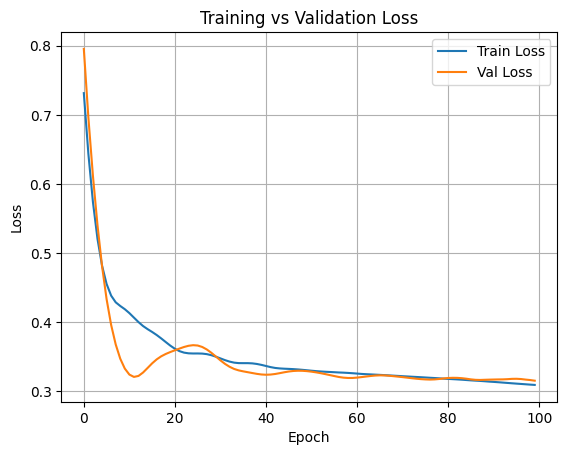

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
test_df = pd.read_csv("test.csv")
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
# The features we are using are good
checkNull(features, test_df)
X_test = test_df[features].values
X_test

GrLivArea      0
TotalBsmtSF    1
GarageArea     1
1stFlrSF       0
dtype: int64


array([[ 896.,  882.,  730.,  896.],
       [1329., 1329.,  312., 1329.],
       [1629.,  928.,  482.,  928.],
       ...,
       [1224., 1224.,  576., 1224.],
       [ 970.,  912.,    0.,  970.],
       [2000.,  996.,  650.,  996.]])

In [ ]:
X_test = test_df[features].values
## Fill null with mean
X_test = imputer.transform(X_test)
## Normalization
X_test = scaler.transform(X_test)  # Use the same scaler as training
## Convert tensor
X_test = torch.tensor(X_test, dtype=torch.float32)

In [ ]:
X_test.isnan().sum()

tensor(0)

In [ ]:
model.eval()  # Evaluation
with torch.no_grad():  # No graident calculation
    y_pred = model(X_test).numpy()
    y_pred = y_scaler.inverse_transform(y_pred).reshape(-1)  # Use the same scaler as training
    print("NaN count in output:", torch.isnan(model(X_test)).sum())

NaN count in output: tensor(0)


In [ ]:
y_pred

array([123303.79, 155095.25, 182084.03, ..., 179491.06, 102850.87,
       239876.62], dtype=float32)

In [ ]:
submission = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': y_pred
})
submission.to_csv("submission.csv", index=False)

In [ ]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>